# **Разведочный анализ данных (EDA)**

## 1. Загрузка и изучение датасета

Импорт библиотек.

In [292]:
%matplotlib inline
import numpy as np
import pandas as pd
import ast
import re
import json

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import scipy.stats as stats

import sklearn.linear_model as lm

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [217]:
!gdown --id 1929efzygq1eTd9qoXZo12CgG09sEIv2c

row_df = pd.read_excel('region roles (26.05.22).xlsx')

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1929efzygq1eTd9qoXZo12CgG09sEIv2c
To: /content/region roles (26.05.22).xlsx
100% 84.4M/84.4M [00:00<00:00, 239MB/s]


In [218]:
row_df.head()

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,immediate_redirect_url
0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,NaN
1,1,54653519,False,Тестировщик.Net,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
2,2,55116066,False,Пентестер,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
3,3,54031261,False,Ведущий Специалист по информационным технологиям,"{'id': 'pochta-4352-office', 'name': '«Почта Р...",False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<ul> <li>Администрирование компьютерной сети</...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN
4,4,55243040,False,Специалист по защите информации,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<strong>Обязанности:</strong> <ul> <li>Обеспеч...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN


In [219]:
row_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   id                        69656 non-null  int64  
 2   premium                   69656 non-null  bool   
 3   name                      69656 non-null  object 
 4   department                5263 non-null   object 
 5   has_test                  69656 non-null  bool   
 6   response_letter_required  69656 non-null  bool   
 7   area                      69656 non-null  object 
 8   salary                    37590 non-null  object 
 9   type                      69656 non-null  object 
 10  address                   40318 non-null  object 
 11  response_url              1 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              69656 non-null  object 
 14  create

В датасете 69656 записей, 34 колонки.
Записи по типам: логического типа 5, вещественного типа 1, целого типа 2, типа объект 26(в том числе и зарплата).
Также в датасете есть практические нулевые записи(response_url, sort_point_distance, immediate_redirect_url) и insider_interview 552 ненулевых значений, которые не важны для нашего анализа.
Также есть пустые строки в ячейках отдела, зарплаты, адреса и контактов.

## 2. Выбор колонок для анализа.

Для анализа нам нужны:
* id
* название вакансии (name)
* зарплата (salary)
* работодатель (employer)
* график работы (schedule)
* опыт работы (experience)
* ключевые навыки(key_skills)
* специализация(specializations)
* регион (region)






Посмотрим наличие явных дубликатов и удалим их.

In [220]:
row_df['id'].duplicated().sum()

233

In [221]:
row_df = row_df.drop_duplicates(subset='id')

In [222]:
row_df['id'].duplicated().sum()

0

## 3. Обработка необходимых колонок

### Специализация (`specializations`)

Нас интересуют информационные технологии. Перобразуем колонку специализации в тип list и отфильтруем весь датасет по интересующей нас специализации.

In [223]:
row_df['specializations']

0        [{'id': '1.172', 'name': 'Начальный уровень, М...
1        [{'id': '1.221', 'name': 'Программирование, Ра...
2        [{'id': '1.221', 'name': 'Программирование, Ра...
3        [{'id': '1.110', 'name': 'Компьютерная безопас...
4        [{'id': '1.110', 'name': 'Компьютерная безопас...
                               ...                        
69651    [{'id': '1.221', 'name': 'Программирование, Ра...
69652    [{'id': '1.221', 'name': 'Программирование, Ра...
69653    [{'id': '9.94', 'name': 'Информационные технол...
69654    [{'id': '9.94', 'name': 'Информационные технол...
69655    [{'id': '9.94', 'name': 'Информационные технол...
Name: specializations, Length: 69423, dtype: object

Функция для нахождения названия специализации.

In [224]:
def find_btw(s, first, last, x=None):
  ss = s.replace("'", "")
  pattern = f'{first}(.*?){last}'
  out = [] if ss == '[{}]' else re.findall(pattern, ss)
  if out and x:
    return out[0]
  return out

In [225]:
df_it = row_df.copy()
df_it['specializations'] = [find_btw(x, 'profarea_name: ', '}') for x in row_df['specializations']]

In [226]:
df_it['specializations']

0        [Информационные технологии, интернет, телеком,...
1        [Информационные технологии, интернет, телеком,...
2        [Информационные технологии, интернет, телеком,...
3        [Информационные технологии, интернет, телеком,...
4        [Информационные технологии, интернет, телеком,...
                               ...                        
69651    [Информационные технологии, интернет, телеком,...
69652    [Информационные технологии, интернет, телеком,...
69653    [Высший менеджмент, Информационные технологии,...
69654    [Высший менеджмент, Информационные технологии,...
69655    [Высший менеджмент, Информационные технологии,...
Name: specializations, Length: 69423, dtype: object

In [227]:
filter = ['Информационные технологии, интернет, телеком' in x for x in df_it['specializations']]

In [228]:
df_it = df_it[filter]

In [229]:
df_it.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50202 entries, 0 to 69655
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                50202 non-null  int64  
 1   id                        50202 non-null  int64  
 2   premium                   50202 non-null  bool   
 3   name                      50202 non-null  object 
 4   department                4467 non-null   object 
 5   has_test                  50202 non-null  bool   
 6   response_letter_required  50202 non-null  bool   
 7   area                      50202 non-null  object 
 8   salary                    22650 non-null  object 
 9   type                      50202 non-null  object 
 10  address                   26801 non-null  object 
 11  response_url              0 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              50202 non-null  object 
 14  create

### Ключевые навыки (`key_skills`)

Аналогично преобразуем колонку с ключевыми навыками.

In [230]:
df_it['key_skills']

0                                                       []
1        [{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...
2        [{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...
3        [{'name': 'Пользователь ПК'}, {'name': 'Работа...
4        [{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...
                               ...                        
69651                                                   []
69652    [{'name': '1С: Управление Торговлей'}, {'name'...
69653    [{'name': 'Организаторские навыки'}, {'name': ...
69654                                                   []
69655    [{'name': 'Информационная безопасность'}, {'na...
Name: key_skills, Length: 50202, dtype: object

In [231]:
key_skills = df_it[['key_skills']].copy()

In [232]:
key_skills.loc[:, 'key_skills_list'] = [find_btw(x, 'name: ', '}') for x in df_it['key_skills']]
key_skills

,key_skills,key_skills_list
0,[],[]
1,"[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[Git, SQL, Тестирование, C#, API]"
2,"[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[SQL, Linux, Информационная безопасность, Рабо..."
3,"[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[Пользователь ПК, Работа в команде, 1С: Предпр..."
4,"[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[MS Dos, Диагностика ПК, Компьютер, Работа в у..."
...,...,...
69651,[],[]
69652,"[{'name': '1С: Управление Торговлей'}, {'name'...","[1С: Управление Торговлей, 1С: Предприятие 8, ..."
69653,"[{'name': 'Организаторские навыки'}, {'name': ...","[Организаторские навыки, Работа в команде, Упр..."
69654,[],[]


In [233]:
key_skills_r = key_skills[['key_skills_list']].copy()

### Зарплата (`salary`)

In [234]:
df_it['salary']

0                                                      NaN
1        {'from': 25000, 'to': 50000, 'currency': 'RUR'...
2                                                      NaN
3        {'from': 26000, 'to': None, 'currency': 'RUR',...
4        {'from': 20000, 'to': 20000, 'currency': 'RUR'...
                               ...                        
69651                                                  NaN
69652    {'from': 130000, 'to': None, 'currency': 'RUR'...
69653    {'from': 50000, 'to': None, 'currency': 'RUR',...
69654    {'from': 85000, 'to': None, 'currency': 'RUR',...
69655                                                  NaN
Name: salary, Length: 50202, dtype: object

Создадим колонки с зарплатой "от" и "до", столбец с валютой, а также ставку НДФЛ.

In [235]:
salary_row = df_it[['salary']].copy()
salary_row['salary'] = salary_row['salary'].fillna('{}')
salary_row['wage'] = [ast.literal_eval(x) for x in salary_row['salary']]

In [236]:
salary = pd.DataFrame.from_records(salary_row['wage'].values, salary_row['wage'].index)

In [237]:
salary.columns = list(map('salary_'.__add__, salary.columns))

In [238]:
salary

,salary_from,salary_to,salary_currency,salary_gross
0,NaN,NaN,NaN,NaN
1,25000.0,50000.0,RUR,True
2,NaN,NaN,NaN,NaN
3,26000.0,NaN,RUR,True
4,20000.0,20000.0,RUR,False
...,...,...,...,...
69651,NaN,NaN,NaN,NaN
69652,130000.0,NaN,RUR,False
69653,50000.0,NaN,RUR,False
69654,85000.0,NaN,RUR,False


Заменим значения True и False на 0,87 и 1 соответсвенно. Так как зарплата указана где-то с учетом НДФЛ, а где-то без учета.

In [239]:
salary = salary.replace({'salary_gross':{True: 0.87, False:1}})
salary

,salary_from,salary_to,salary_currency,salary_gross
0,NaN,NaN,NaN,NaN
1,25000.0,50000.0,RUR,0.87
2,NaN,NaN,NaN,NaN
3,26000.0,NaN,RUR,0.87
4,20000.0,20000.0,RUR,1.00
...,...,...,...,...
69651,NaN,NaN,NaN,NaN
69652,130000.0,NaN,RUR,1.00
69653,50000.0,NaN,RUR,1.00
69654,85000.0,NaN,RUR,1.00


Создаем столбы с зарплатой в рублях.

In [240]:
rates = dict(RUR=1, USD=59.78, EUR=59.84, KZT=0.12)

salary['salary_min'] = salary['salary_currency'].map(rates) * \
    salary['salary_from'] * salary['salary_gross']
salary['salary_max'] = salary['salary_currency'].map(rates) * \
    salary['salary_to'] * salary['salary_gross']

In [241]:
salary[['salary_min', 'salary_max', 'salary_currency']]

,salary_min,salary_max,salary_currency
0,NaN,NaN,NaN
1,21750.0,43500.0,RUR
2,NaN,NaN,NaN
3,22620.0,NaN,RUR
4,20000.0,20000.0,RUR
...,...,...,...
69651,NaN,NaN,NaN
69652,130000.0,NaN,RUR
69653,50000.0,NaN,RUR
69654,85000.0,NaN,RUR


In [242]:
salary_r = salary[['salary_min', 'salary_max', 'salary_currency']].copy()

### Работодатель(`employer`)

In [243]:
df_it['employer'][0]

"{'id': '1740', 'name': 'Яндекс', 'url': 'https://api.hh.ru/employers/1740', 'alternate_url': 'https://hh.ru/employer/1740', 'logo_urls': {'90': 'https://hhcdn.ru/employer-logo/3790847.png', '240': 'https://hhcdn.ru/employer-logo/3790848.png', 'original': 'https://hhcdn.ru/employer-logo-original/837491.png'}, 'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=1740', 'trusted': True}"

In [244]:
employer = df_it[['employer']].copy()

In [245]:
employer.loc[:, 'employer_name'] = [find_btw(x, 'name: ', ',',5) for x in employer['employer']]
employer

,employer,employer_name
0,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",Яндекс
1,"{'id': '1245158', 'name': 'МФК Саммит', 'url':...",МФК Саммит
2,"{'id': '719820', 'name': 'SearchInform', 'url'...",SearchInform
3,"{'id': '4352', 'name': 'Почта России', 'url': ...",Почта России
4,"{'id': '6694236', 'name': 'ГБПОУ АО Астраханск...",ГБПОУ АО Астраханский музыкальный колледж имен...
...,...,...
69651,"{'id': '47858', 'name': 'Центральный банк Росс...",Центральный банк Российской Федерации
69652,"{'id': '97966', 'name': 'Окраина', 'url': 'htt...",Окраина
69653,"{'id': '4494454', 'name': 'ГУЗ ГБ № 3 Г.Тулы',...",ГУЗ ГБ № 3 Г.Тулы
69654,"{'id': '180706', 'name': 'ИнтерЛабс', 'url': '...",ИнтерЛабс


In [246]:
employer_r = employer[['employer_name']].copy()

### График работы (`schedule`)

In [247]:
df_it['schedule']

0        {'id': 'remote', 'name': 'Удаленная работа'}
1            {'id': 'fullDay', 'name': 'Полный день'}
2            {'id': 'fullDay', 'name': 'Полный день'}
3            {'id': 'fullDay', 'name': 'Полный день'}
4            {'id': 'fullDay', 'name': 'Полный день'}
                             ...                     
69651        {'id': 'fullDay', 'name': 'Полный день'}
69652        {'id': 'fullDay', 'name': 'Полный день'}
69653        {'id': 'fullDay', 'name': 'Полный день'}
69654        {'id': 'fullDay', 'name': 'Полный день'}
69655        {'id': 'fullDay', 'name': 'Полный день'}
Name: schedule, Length: 50202, dtype: object

In [248]:
schedule = df_it[['schedule']].copy()
schedule.loc[:, 'sched'] = [find_btw(x, 'name: ', '}',5) for x in schedule['schedule']]

In [249]:
schedule.head()

,schedule,sched
0,"{'id': 'remote', 'name': 'Удаленная работа'}",Удаленная работа
1,"{'id': 'fullDay', 'name': 'Полный день'}",Полный день
2,"{'id': 'fullDay', 'name': 'Полный день'}",Полный день
3,"{'id': 'fullDay', 'name': 'Полный день'}",Полный день
4,"{'id': 'fullDay', 'name': 'Полный день'}",Полный день


In [250]:
schedule_r = schedule[['sched']].copy()

### Опыт работы(experience)

In [251]:
experience = df_it[['experience']].copy()
experience.head()

,experience
0,"{'id': 'noExperience', 'name': 'Нет опыта'}"
1,"{'id': 'between1And3', 'name': 'От 1 года до 3..."
2,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}"
3,"{'id': 'noExperience', 'name': 'Нет опыта'}"
4,"{'id': 'noExperience', 'name': 'Нет опыта'}"


In [252]:
experience.loc[:, 'exp'] = [find_btw(x, 'name: ', '}',5) for x in experience['experience']]
experience.head()

,experience,exp
0,"{'id': 'noExperience', 'name': 'Нет опыта'}",Нет опыта
1,"{'id': 'between1And3', 'name': 'От 1 года до 3...",От 1 года до 3 лет
2,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",От 3 до 6 лет
3,"{'id': 'noExperience', 'name': 'Нет опыта'}",Нет опыта
4,"{'id': 'noExperience', 'name': 'Нет опыта'}",Нет опыта


In [253]:
experience_r = experience[['exp']].copy()

### Итоговый датасет

In [254]:
df_contact = df_it[['id', 'name', 'region']].copy()

Соединим обработанные датасеты(`salary`, `employer`, `schedule`, `key_skills`) в один.

In [255]:
df = pd.concat([df_contact, salary_r, employer_r, schedule_r, key_skills_r, experience_r], axis=1)
df.head()

,id,name,region,salary_min,salary_max,salary_currency,employer_name,sched,key_skills_list,exp
0,49059633,Младший специалист ручного тестирования,Астраханская область,NaN,NaN,NaN,Яндекс,Удаленная работа,[],Нет опыта
1,54653519,Тестировщик.Net,Астраханская область,21750.0,43500.0,RUR,МФК Саммит,Полный день,"[Git, SQL, Тестирование, C#, API]",От 1 года до 3 лет
2,55116066,Пентестер,Астраханская область,NaN,NaN,NaN,SearchInform,Полный день,"[SQL, Linux, Информационная безопасность, Рабо...",От 3 до 6 лет
3,54031261,Ведущий Специалист по информационным технологиям,Астраханская область,22620.0,NaN,RUR,Почта России,Полный день,"[Пользователь ПК, Работа в команде, 1С: Предпр...",Нет опыта
4,55243040,Специалист по защите информации,Астраханская область,20000.0,20000.0,RUR,ГБПОУ АО Астраханский музыкальный колледж имен...,Полный день,"[MS Dos, Диагностика ПК, Компьютер, Работа в у...",Нет опыта


In [256]:
df = df.rename(columns={'employer_name': 'employer', 'sched':'schedule', 'exp':'experience', 'key_skills_list': 'key_skills'})

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50202 entries, 0 to 69655
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               50202 non-null  int64  
 1   name             50202 non-null  object 
 2   region           50202 non-null  object 
 3   salary_min       20148 non-null  float64
 4   salary_max       11847 non-null  float64
 5   salary_currency  22650 non-null  object 
 6   employer         50202 non-null  object 
 7   schedule         50202 non-null  object 
 8   key_skills       50202 non-null  object 
 9   experience       50202 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 5.2+ MB


## 5. Анализ числовых данных

### **Неграфический анализ**

Найдем максимальную зарплату, минимальную, среднюю и найдем медиану.

In [258]:
value_of_salary_from = df['salary_min']
value_of_salary_to = df['salary_max']

print('Максимальная зарплата', value_of_salary_to.max())
print('Минимальная зарплата', value_of_salary_from.min())
print('Средняя зарплата', value_of_salary_from.mean())
print('Медиальная зарплата', value_of_salary_from.median())

Максимальная зарплата 1740000.0
Минимальная зарплата 25.0
Средняя зарплата 79597.4225203494
Медиальная зарплата 60000.0


In [259]:
value_of_salary_from.describe().round(1)

count     20148.0
mean      79597.4
std       62195.5
min          25.0
25%       35000.0
50%       60000.0
75%      100000.0
max      870000.0
Name: salary_min, dtype: float64

### **Графический анализ.**

In [260]:
value_of_salary_from = value_of_salary_from[value_of_salary_from < 350000]

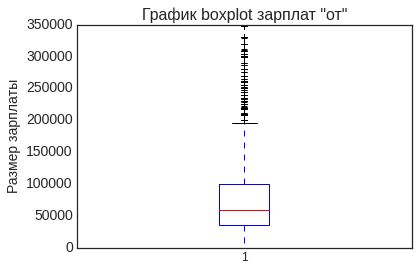

In [261]:
plt.boxplot(value_of_salary_from)
plt.axis(ymin=0, ymax=350000)
plt.title('График boxplot зарплат "от"', fontsize=16)
plt.ylabel('Размер зарплаты', fontsize=14)
plt.style.use('seaborn')
plt.show()

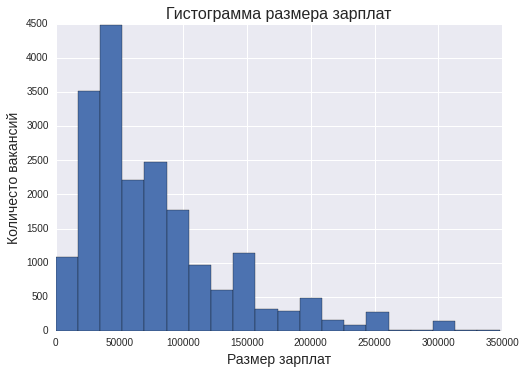

In [262]:
plt.hist(value_of_salary_from, bins=20)
plt.title('Гистограмма размера зарплат', fontsize=16)
plt.ylabel('Количесто вакансий', fontsize=14)
plt.xlabel('Размер зарплат', fontsize=14)
plt.style.use('bmh')
plt.show()

**Выводы:** Основной бокс зарплат от 36000 до 100000. Средняя зарплата по информационным технологиям 79000, медиальная 60000, то есть больше всего вакансий с зарплатой в размере 60000.

## 6. Анализ категориальных данных

### **Неграфический анализ**

In [263]:
df['name'].describe()

count                       50202
unique                      24008
top       Системный администратор
freq                         1650
Name: name, dtype: object

Самая часто встречающаяся вакансия(1650 раз) "Системный администратор".

Выведем топ-20 часто встречающихся вакансий.

In [264]:
df['name'].value_counts()[:20]

Системный администратор                        1650
Программист 1С                                 1119
Специалист технической поддержки                478
Системный аналитик                              465
Аналитик                                        343
Инженер-программист                             328
Программист 1C                                  325
Графический дизайнер                            312
Инженер технической поддержки                   273
Бизнес-аналитик                                 267
Дизайнер                                        252
Технический писатель                            214
Руководитель проекта                            210
Специалист по информационной безопасности       185
Frontend-разработчик                            184
Программист                                     181
DevOps инженер                                  181
Специалист службы поддержки в Яндекс Бизнес     168
Руководитель проектов                           162
Менеджер про

Видим, что программист 1С встречается дважды, возможно, это из-за того, что "С" написано и на русском и на аглийском.

Посмотрим какие специальности еще повторяются и попытаемся привести их к одному виду. Напишем функцию для замены значений.

In [265]:
def replace_duplicates_name(wrong_values, correct_value):
  for wrong_value in wrong_values:
    df['name'] = df['name'].replace(wrong_value, correct_value)

Функция для поиска подстроки в названии, которая выводит список со всеми некорректными названиями.

In [266]:
def search_for_similar_name(str):
  district = []
  for name in df['name']:
    if str.lower() in name.lower():
      district.append(name)
  return district

In [267]:
replace_duplicates_name(search_for_similar_name('поддержки'), 'Специалист службы поддержки')
replace_duplicates_name(search_for_similar_name('Ведущий специалист по информационным технологиям'), 'Ведущий специалист по информационным технологиям')
replace_duplicates_name(search_for_similar_name('1с'), 'Программист 1С')
replace_duplicates_name(search_for_similar_name('1c'), 'Программист 1С')
replace_duplicates_name(search_for_similar_name('1 с'), 'Программист 1С')
replace_duplicates_name(search_for_similar_name('1 c'), 'Программист 1С')

In [268]:
df['name'].describe()

count              50202
unique             21316
top       Программист 1С
freq                4809
Name: name, dtype: object

Видим, что значение популярной вакансии изменилось.

In [269]:
df['name'].value_counts()[:20]

Программист 1С                               4809
Специалист службы поддержки                  4187
Системный администратор                      1650
Системный аналитик                            465
Аналитик                                      343
Инженер-программист                           328
Графический дизайнер                          312
Бизнес-аналитик                               267
Дизайнер                                      252
Технический писатель                          214
Руководитель проекта                          210
Специалист по информационной безопасности     185
Frontend-разработчик                          184
Программист                                   181
DevOps инженер                                181
Руководитель проектов                         162
Менеджер проектов                             161
Младший специалист ручного тестирования       159
Java-разработчик                              143
Ведущий системный администратор               132


Выведем топ ключевых навыков.

In [271]:
key_df = df[['key_skills', 'id']]
key_df

,key_skills,id
0,[],49059633
1,"[Git, SQL, Тестирование, C#, API]",54653519
2,"[SQL, Linux, Информационная безопасность, Рабо...",55116066
3,"[Пользователь ПК, Работа в команде, 1С: Предпр...",54031261
4,"[MS Dos, Диагностика ПК, Компьютер, Работа в у...",55243040
...,...,...
69651,[],66113834
69652,"[1С: Управление Торговлей, 1С: Предприятие 8, ...",66113885
69653,"[Организаторские навыки, Работа в команде, Упр...",54749225
69654,[],55498724


In [272]:
key_df = key_df.explode('key_skills').dropna() 
key_df[:20]

,key_skills,id
1,Git,54653519
1,SQL,54653519
1,Тестирование,54653519
1,C#,54653519
1,API,54653519
2,SQL,55116066
2,Linux,55116066
2,Информационная безопасность,55116066
2,Работа с базами данных,55116066
2,Базы данных,55116066


In [273]:
top_key = key_df['key_skills'].value_counts()
top_key[:10]

SQL                     6360
Linux                   4912
Git                     4569
Английский язык         3948
Работа в команде        3465
Управление проектами    3443
Python                  3227
JavaScript              2755
1С программирование     2587
PostgreSQL              2550
Name: key_skills, dtype: int64

Видим, что наиболее популярные навыки это SQL, Linux, Git, Английский язык, Работа в команде.

### **Графический анализ**

Построим топ вакансий IT.

In [274]:
top_name = df['name'].value_counts()[:20]

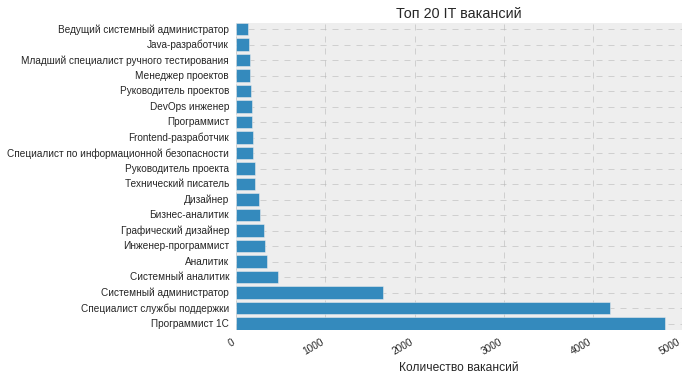

In [275]:
plt.xticks(rotation=30, ha='right')
plt.title('Топ 20 IT вакансий')
plt.style.use('seaborn-pastel')
plt.xlabel('Количество вакансий')
params = {
    'axes.titlesize':16,
    'xtick.labelsize':12,
    'ytick.labelsize':14,
    'axes.labelsize':14
}
plt.rcParams.update(params)
plt.barh(top_name.index, top_name.values)
plt.show()

Построим график топ-20 навыков.

In [276]:
top_key = top_key[:20]

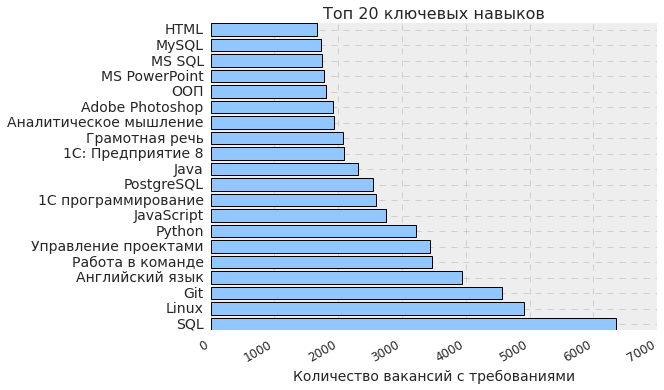

In [277]:
plt.xticks(rotation=30, ha='right')
plt.title('Топ 20 ключевых навыков')
plt.style.use('classic')
plt.xlabel('Количество вакансий с требованиями')
params = {
    'axes.titlesize':16,
    'xtick.labelsize':12,
    'ytick.labelsize':14,
    'axes.labelsize':14
}
plt.rcParams.update(params)
plt.barh(top_key.index, top_key.values)
plt.show()

**Вывод:** Видим, что популярными вакансиями являются Программист 1С, Специалист службы поддержки, Системный администратор. 
Востребованные навыки: SQL, Linux, Git.

## 7. Анализ взаимосвязей колонок

### **1. Анализ взаимосвязи категориальной и числовой переменных.**

Возьмем колонку с зарплатой "от" и название вакансии. Посчитаем среднюю зарплату по вакансиям.

In [278]:
districts = ['Программист 1С', 'Специалист службы поддержки', 'Системный администратор', 'Системный аналитик', 'Аналитик']

filter = df['name'].isin(districts)

filter_df = df[filter]

In [279]:
filter_df.groupby('name')['salary_min'].describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Аналитик,138.0,56379.734348,37089.575511,30.0,35000.000,45000.0,60000.0,200100.0
Программист 1С,2482.0,97017.128884,46796.829914,60.0,60000.000,95700.0,130000.0,304500.0
Системный администратор,1002.0,51545.705409,23455.860209,30.0,35000.000,47000.0,60900.0,180000.0
Системный аналитик,78.0,106606.192564,55576.227781,28971.0,67215.765,90000.0,150000.0,261000.0
Специалист службы поддержки,2796.0,33343.926295,23922.014991,11310.0,13050.000,27000.0,40237.5,300000.0


*Построим график.*

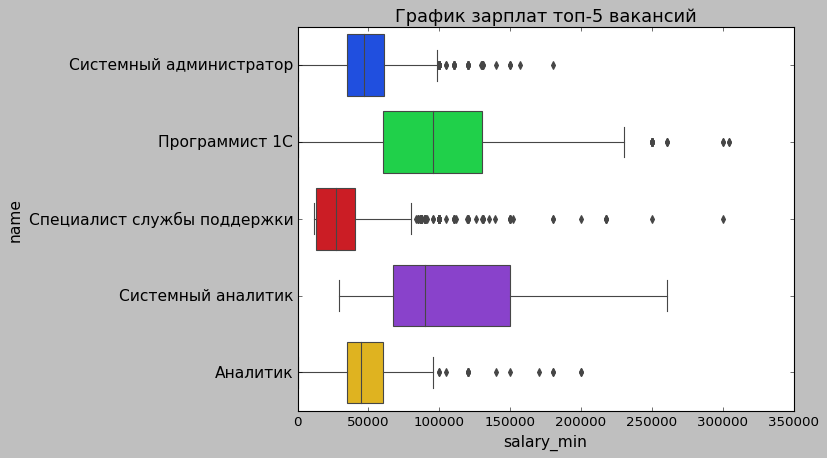

In [280]:
plt.axis(ymin=0, ymax=270000)
plt.title('График зарплат топ-5 вакансий', fontsize=16)
plt.ylabel('Зарплата', fontsize=14)
plt.xlabel('Вакансии', fontsize=14)
plt.style.use('seaborn-bright')
sns.boxplot(x='salary_min', y='name', data=filter_df)
plt.show()

### **2. Анализ двух категориальных переменных.**

Возьмем названия топ-5 вакансий и ключевые навыки.

In [282]:
graf_df = filter_df[['key_skills', 'name']]
graf_df = graf_df.explode('key_skills').dropna()
graf_df


,key_skills,name
56,Ответственность и пунктуальность,Системный администратор
56,Администрирование сетевого оборудования,Системный администратор
56,Настройка сетевых подключений,Системный администратор
56,Настройка ПК,Системный администратор
56,Настройка ПО,Системный администратор
...,...,...
69652,1С: Управление Торговлей,Программист 1С
69652,1С: Предприятие 8,Программист 1С
69652,1С программирование,Программист 1С
69652,1С: Зарплата и управление персоналом,Программист 1С


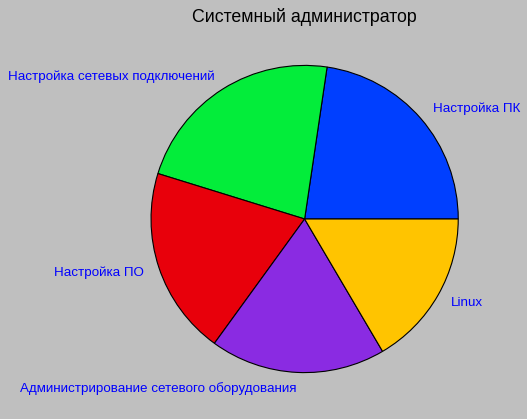

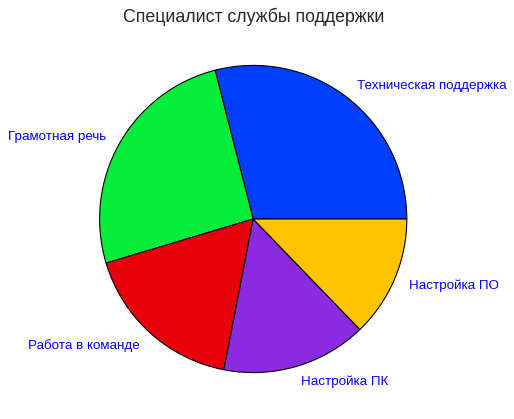

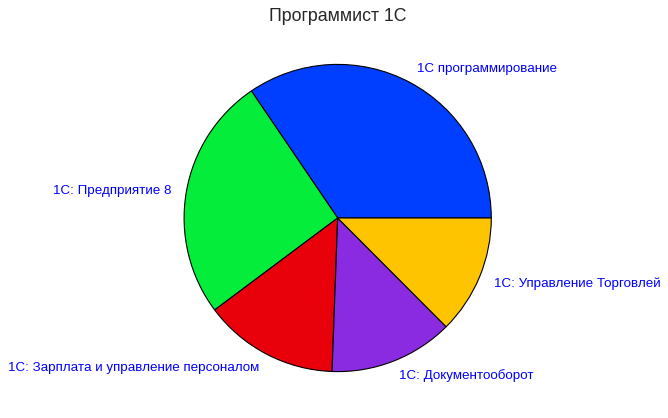

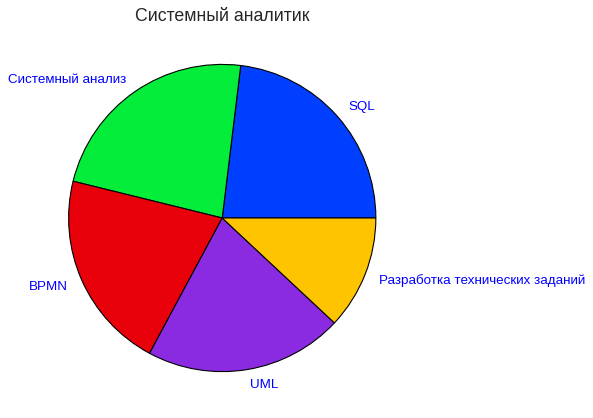

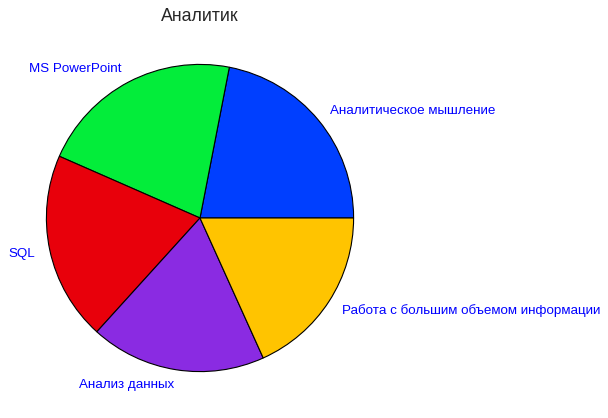

In [284]:
name_types = graf_df['name'].unique()

for name_type in name_types: 
  spec_df = graf_df[graf_df['name']==name_type]

  class_counts = spec_df['key_skills'].value_counts()[:5]
  labels =class_counts.index

  plt.title(name_type)
  patches, texts = plt.pie(
      class_counts.values, 
      labels = labels, 
      textprops=dict(color="b") 
      )

  plt.style.use('seaborn-white')
  plt.show()

**Вывод:** На графиках видно какие ключевые навыки требуются и какие из них чаще встречаются в топ-5 вакансиях. 

## Выводы.

Мы проанализировали датасет, выяснили, что в среднем размер зарплаты составляет 79000 для IT специализаций. Нашли популярные вакансии, ими оказались программист 1С, мпециалист службы поддержки, системный администратор. Увидели, что основными требуемыми навыками являются SQL, Linux, Git, знание английского языка. Так же вывели топ навыков для 10 топовых профессий.

# **Статистический анализ данных.**

## 1. Структурирование таблицы. Таблица "объект-свойство"

Для удобства из всего датасета возьмем нужные нам колонки.

In [285]:
stat_df = df.drop(['id', 'salary_currency'], axis=1)
stat_df.head()

,name,region,salary_min,salary_max,employer,schedule,key_skills,experience
0,Младший специалист ручного тестирования,Астраханская область,NaN,NaN,Яндекс,Удаленная работа,[],Нет опыта
1,Тестировщик.Net,Астраханская область,21750.0,43500.0,МФК Саммит,Полный день,"[Git, SQL, Тестирование, C#, API]",От 1 года до 3 лет
2,Пентестер,Астраханская область,NaN,NaN,SearchInform,Полный день,"[SQL, Linux, Информационная безопасность, Рабо...",От 3 до 6 лет
3,Ведущий специалист по информационным технологиям,Астраханская область,22620.0,NaN,Почта России,Полный день,"[Пользователь ПК, Работа в команде, 1С: Предпр...",Нет опыта
4,Специалист по защите информации,Астраханская область,20000.0,20000.0,ГБПОУ АО Астраханский музыкальный колледж имен...,Полный день,"[MS Dos, Диагностика ПК, Компьютер, Работа в у...",Нет опыта


## 2. Определение типов данных.

In [286]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50202 entries, 0 to 69655
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        50202 non-null  object 
 1   region      50202 non-null  object 
 2   salary_min  20148 non-null  float64
 3   salary_max  11847 non-null  float64
 4   employer    50202 non-null  object 
 5   schedule    50202 non-null  object 
 6   key_skills  50202 non-null  object 
 7   experience  50202 non-null  object 
dtypes: float64(2), object(6)
memory usage: 4.5+ MB


Типы данных в stat_df:
 1. name - категориальный тип
 2. salary_ min, salary_max - количественный тип
 3. employer - категориальный тип
 4. region - категориальный тип
 5. shedule - категориальный тип
 6. experience - категориальный тип (можно привести к порядковому)
 7. key_skills - категориальный тип


## 3. Визуализация данных в зависимости от типа.

### Гистограмма

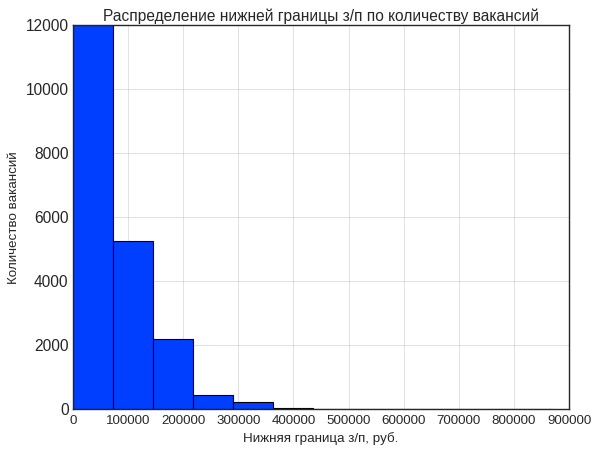

In [287]:
stat_df['salary_min'].hist(bins=12)
plt.title("Распределение нижней границы з/п по количеству вакансий", fontsize = 14)
plt.ylabel('Количество вакансий', fontsize = 12) # Подпись оси Y
plt.xlabel('Нижняя граница з/п, руб.', fontsize = 12) # Подпись оси x
plt.style.use('seaborn')
plt.show()

### Столбчатая диаграмма

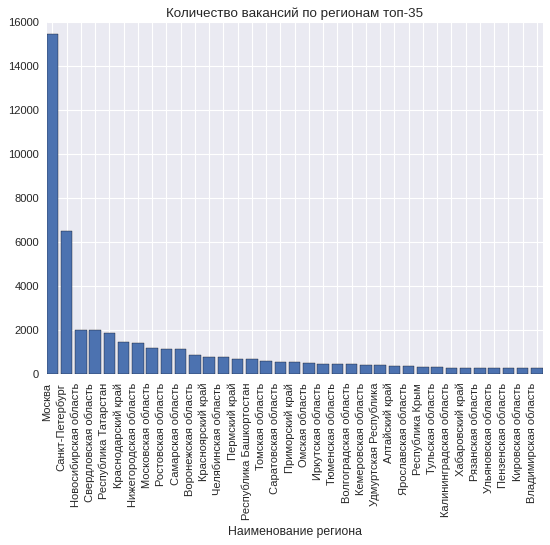

In [288]:
region_vac_count = stat_df['region'].value_counts()[:35]
plt.xticks(rotation=90, ha='right')
plt.title('Количество вакансий по регионам топ-35')
plt.style.use('seaborn')
plt.xlabel('Наименование региона')
params = {
    'axes.titlesize':16,
    'xtick.labelsize':12,
    'ytick.labelsize':14,
    'axes.labelsize':14
}
plt.rcParams.update(params)
plt.bar(region_vac_count.index, region_vac_count.values)
plt.show()

### Круговая диаграмма

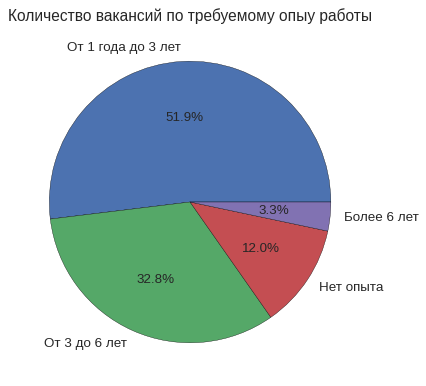

In [289]:
experience_count = stat_df['experience'].value_counts()

plt.pie(experience_count, labels = experience_count.index, autopct='%1.1f%%')
plt.title(label = "Количество вакансий по требуемому опыу работы", fontsize = 14)
plt.show()

## 4. Проверка гипотезы о виде распределения для количественных показателей.

Проверяем на нормальность, чтобы в дальнейшем понять с какими критериями мы будем работать - параметрическими или непараметрическими. Если выборка отвечает нормальному распределению, то мы будем пользоваться параметрическими критериями.

Тест д'Агостино(Ralph D’Agostino) - вычисляет итоговую статистику на основе данных, а именно, эксцесс и асимметрия, чтобы определить, отклоняется ли распределение данных от нормального распределения.

**Гипотеза Н0:** наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05.

In [290]:
stats.normaltest(stat_df['salary_min'].dropna())

NormaltestResult(statistic=8636.346403184487, pvalue=0.0)

Значение p-value очень близко к нулю, оно меньше уровня значимости, поэтому гипотезу о том, что выборка подчиняется нормальному закону распределения **отклоняем.**

## 5. Оценка связи между показателями.

### 1. Критерии сравнения групп для анализа связи количественных или порядковых показателей с категориальными. 

**Гипотеза H0:** зависимость графика работы и зарплаты отсутствует.

Удалим выбросы и построим график зарплат и графика работы.

Text(0, 0.5, 'Размер зарплаты')

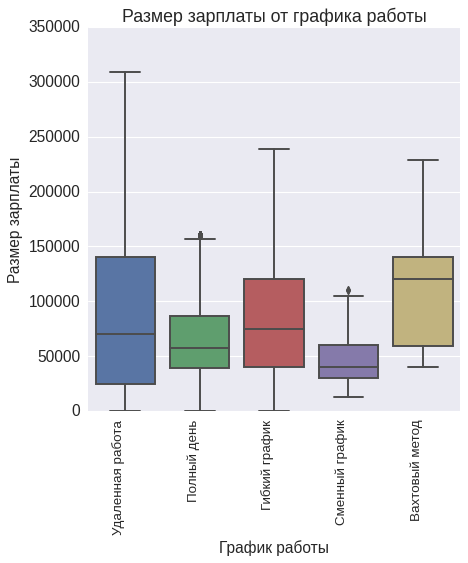

In [291]:
df1 = stat_df.drop(stat_df.loc[(stat_df['schedule'] == 'Полный день') & (stat_df['salary_min'] > 160_000)].index)
df1 = df1.drop(df1.loc[(df1['schedule'] == 'Удаленная работа') & (df1['salary_min'] > 310_000)].index)
df1 = df1.drop(df1.loc[(df1['schedule'] == 'Гибкий график') & (df1['salary_min'] > 245_000)].index)
df1 = df1.drop(df1.loc[(df1['schedule'] == 'Сменный график') & (df1['salary_min'] > 110_000)].index)

f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='schedule', y='salary_min', data=df1)
plt.xticks(rotation=90, ha='right')
plt.title('Размер зарплаты от графика работы')
plt.xlabel('График работы')
plt.ylabel('Размер зарплаты')

In [293]:
dfd1=np.array(df1[df1['schedule']=='Сменный график']['salary_min'])
dfd2=np.array(df1[df1['schedule']=='Полный день']['salary_min'])
dfd3=np.array(df1[df1['schedule']=='Гибкий график']['salary_min'])
dfd4=np.array(df1[df1['schedule']=='Удаленная работа']['salary_min'])
dfd5=np.array(df1[df1['schedule']=='Вахтовый метод']['salary_min'])
stats.mstats.kruskalwallis(dfd1,dfd2,dfd3,dfd4,dfd5)

KruskalResult(statistic=276.6312530706038, pvalue=1.1865511569999586e-58)

Получили значение p-value много меньше уровня значимости, значит мы отвергаем нулевую гипотезу и принимаем альтернативную: **график работы влияет на уровень зарплаты.**

### 2. Анализ таблиц сопряженности для оценки связи двух категориальных признаков. 

Оценим статистическую значимость различий двух относительных показателей: опыт работы и график работы.
Гипотеза H0: опыт работы не влияет на график работы.

In [294]:
wd=pd.crosstab(stat_df['experience'],stat_df['schedule']); wd

schedule,Вахтовый метод,Гибкий график,Полный день,Сменный график,Удаленная работа
experience,,,,,
Более 6 лет,9,62,1320,1,273
Нет опыта,2,294,3592,331,1783
От 1 года до 3 лет,48,1071,19868,512,4572
От 3 до 6 лет,65,624,12151,72,3552


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Удаленная работа'),
  Text(1, 0, 'Полный день'),
  Text(2, 0, 'Гибкий график'),
  Text(3, 0, 'Сменный график'),
  Text(4, 0, 'Вахтовый метод')])

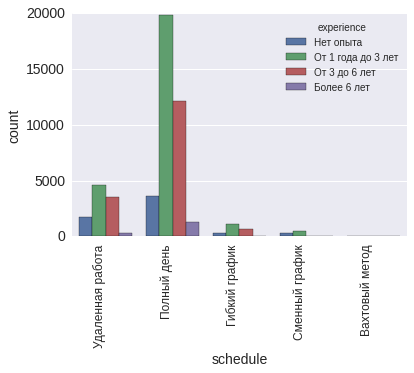

In [295]:
sns.countplot(x=stat_df['schedule'], hue=stat_df['experience'])
plt.xticks(rotation=90, ha='right')

In [296]:
chi2, prob, sdf, expected = scipy.stats.chi2_contingency(wd)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, sdf, prob))

test Statistics: 1273.7810607221456
degrees of freedom: 12
p-value: 2.2208402671185872e-265



Мы видим, что p-value меньше нашего уровня значимости. Следовательно, мы должны отклонить нулевую и принять альтернативную гипотезу о том, что опыт работы влияет на график работы. Но на графике мы видим, что больше всего вакансий на полный день. То есть сам опыт работы не влияет на график работы. 

### 3. Корреляционный анализ Пирсона или Спирмена для количественных или порядковых переменных.

Приведем колонку с опытом к порядковым переменным.

In [297]:
stat_df['experience'].unique()

array(['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет'],
      dtype=object)

In [298]:
def exp(row):
  if row == 'Нет опыта':
    return 'exp_0'
  if row == 'От 1 года до 3 лет':
    return 'exp_1'
  if row == 'От 3 до 6 лет':
    return 'exp_2'
  if row == 'Более 6 лет':
    return 'exp_3'

stat_df['experience_p'] = stat_df['experience'].apply(exp)

stat_df

,name,region,salary_min,salary_max,employer,schedule,key_skills,experience,experience_p
0,Младший специалист ручного тестирования,Астраханская область,NaN,NaN,Яндекс,Удаленная работа,[],Нет опыта,exp_0
1,Тестировщик.Net,Астраханская область,21750.0,43500.0,МФК Саммит,Полный день,"[Git, SQL, Тестирование, C#, API]",От 1 года до 3 лет,exp_1
2,Пентестер,Астраханская область,NaN,NaN,SearchInform,Полный день,"[SQL, Linux, Информационная безопасность, Рабо...",От 3 до 6 лет,exp_2
3,Ведущий специалист по информационным технологиям,Астраханская область,22620.0,NaN,Почта России,Полный день,"[Пользователь ПК, Работа в команде, 1С: Предпр...",Нет опыта,exp_0
4,Специалист по защите информации,Астраханская область,20000.0,20000.0,ГБПОУ АО Астраханский музыкальный колледж имен...,Полный день,"[MS Dos, Диагностика ПК, Компьютер, Работа в у...",Нет опыта,exp_0
...,...,...,...,...,...,...,...,...,...
69651,Программист Java,Тульская область,NaN,NaN,Центральный банк Российской Федерации,Полный день,[],От 3 до 6 лет,exp_2
69652,Программист 1С,Тульская область,130000.0,NaN,Окраина,Полный день,"[1С: Управление Торговлей, 1С: Предприятие 8, ...",От 1 года до 3 лет,exp_1
69653,Начальник отдела информационных технологий,Тульская область,50000.0,NaN,ГУЗ ГБ № 3 Г.Тулы,Полный день,"[Организаторские навыки, Работа в команде, Упр...",От 1 года до 3 лет,exp_1
69654,"Технический директор (DevOps, технолог)",Тульская область,85000.0,NaN,ИнтерЛабс,Полный день,[],От 3 до 6 лет,exp_2


Чтобы провести анализ с помощью критерия, нам надо чтобы пропусков в данных не было. Чтобы избавится от пропусков в колонке зарплаты, мы заменим пустые значения медианой.

In [299]:
stat_df.loc[stat_df['salary_min'].isna(), 'salary_min'] = stat_df['salary_min'].median()
stat_df.loc[stat_df['salary_max'].isna(), 'salary_max'] = stat_df['salary_max'].median()

In [300]:
stat_df['salary_min']

0         60000.0
1         21750.0
2         60000.0
3         22620.0
4         20000.0
           ...   
69651     60000.0
69652    130000.0
69653     50000.0
69654     85000.0
69655     60000.0
Name: salary_min, Length: 50202, dtype: float64

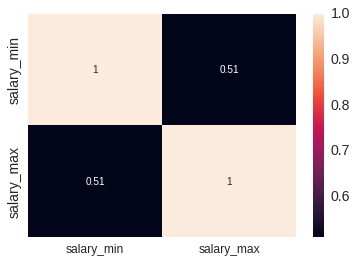

In [301]:
num = ['salary_min','salary_max','experience_p']
hm = sns.heatmap(stat_df[num].corr(),annot=True)

In [302]:
scipy.stats.pearsonr(stat_df.salary_min, stat_df.salary_max)

PearsonRResult(statistic=0.5116052491744513, pvalue=0.0)

Text(0, 0.5, 'Размер зарплаты')

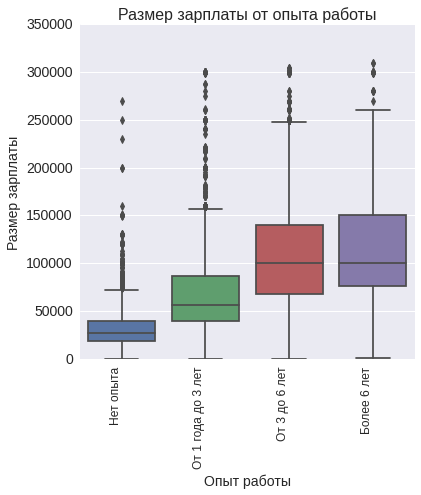

In [303]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='experience', y='salary_min', data=df1)
plt.xticks(rotation=90, ha='right')
plt.title('Размер зарплаты от опыта работы')
plt.xlabel('Опыт работы')
plt.ylabel('Размер зарплаты')

Естественно, видим, что минимальная и максимальная зарплата связаны. А так же, зарплата связана с опытом работы, так как значение p-value близко к нулю, значит мы надежно отвергаем гипотезу об отсутствии связи.

## 6. Формулирование гипотезы.

Приведем график работы к порядковому типу.

In [304]:
stat_df['schedule'].unique()

array(['Удаленная работа', 'Полный день', 'Гибкий график',
       'Сменный график', 'Вахтовый метод'], dtype=object)

In [305]:
def sch(row):
  if row == 'Удаленная работа':
    return 'sch_0'
  if row == 'Полный день':
    return 'sch_1'
  if row == 'Гибкий график':
    return 'sch_2'
  if row == 'Сменный график':
    return 'sch_3'
  return 'sch_4'

stat_df['schedule_p'] = stat_df['schedule'].apply(sch)

stat_df

,name,region,salary_min,salary_max,employer,schedule,key_skills,experience,experience_p,schedule_p
0,Младший специалист ручного тестирования,Астраханская область,60000.0,90000.0,Яндекс,Удаленная работа,[],Нет опыта,exp_0,sch_0
1,Тестировщик.Net,Астраханская область,21750.0,43500.0,МФК Саммит,Полный день,"[Git, SQL, Тестирование, C#, API]",От 1 года до 3 лет,exp_1,sch_1
2,Пентестер,Астраханская область,60000.0,90000.0,SearchInform,Полный день,"[SQL, Linux, Информационная безопасность, Рабо...",От 3 до 6 лет,exp_2,sch_1
3,Ведущий специалист по информационным технологиям,Астраханская область,22620.0,90000.0,Почта России,Полный день,"[Пользователь ПК, Работа в команде, 1С: Предпр...",Нет опыта,exp_0,sch_1
4,Специалист по защите информации,Астраханская область,20000.0,20000.0,ГБПОУ АО Астраханский музыкальный колледж имен...,Полный день,"[MS Dos, Диагностика ПК, Компьютер, Работа в у...",Нет опыта,exp_0,sch_1
...,...,...,...,...,...,...,...,...,...,...
69651,Программист Java,Тульская область,60000.0,90000.0,Центральный банк Российской Федерации,Полный день,[],От 3 до 6 лет,exp_2,sch_1
69652,Программист 1С,Тульская область,130000.0,90000.0,Окраина,Полный день,"[1С: Управление Торговлей, 1С: Предприятие 8, ...",От 1 года до 3 лет,exp_1,sch_1
69653,Начальник отдела информационных технологий,Тульская область,50000.0,90000.0,ГУЗ ГБ № 3 Г.Тулы,Полный день,"[Организаторские навыки, Работа в команде, Упр...",От 1 года до 3 лет,exp_1,sch_1
69654,"Технический директор (DevOps, технолог)",Тульская область,85000.0,90000.0,ИнтерЛабс,Полный день,[],От 3 до 6 лет,exp_2,sch_1


Сгруппируем области по округам.

In [306]:
central = ['Белгородская область', 'Брянская область', 'Владимирская область', 'Воронежская область','Ивановская область', 'Калужская область', 'Костромская область', 'Курская область', 'Липецкая область', 'Московская область', 'Орловская область', 'Рязанская область', 'Смоленская область', 'Тамбовская область', 'Тверская область', 'Тульская область', 'Ярославская область', 'Москва']
south = ['Республика Адыгея', 'Республика Калмыкия', 'Краснодарский край', 'Астраханская область', 'Волгоградская область', 'Ростовская область']
northwest = ['Республика Карелия', 'Республика Коми', 'Архангельская область', 'Вологодская область', 'Калининградская область', 'Ленинградская область', 'Мурманская область', 'Новгородская область', 'Псковская область', 'Санкт-Петербург', 'Ненецкий АО']
far_eastern = ['Республика Саха (Якутия)', 'Камчатский край', 'Приморский край', 'Хабаровский край', 'Амурская область', 'Магаданская область', 'Сахалинская область', 'Еврейская АО', 'Чукотский АО']
siberian = ['Республика Алтай', 'Республика Бурятия', 'Республика Тыва', 'Республика Хакасия', 'Алтайский край', 'Забайкальский край', 'Красноярский край', 'Иркутская область', 'Кемеровская область', 'Новосибирская область', 'Омская область', 'Томская область']
uralsky = ['Курганская область', 'Свердловская область', 'Тюменская область', 'Челябинская область', 'Ханты-Мансийский АО - Югра', 'Ямало-Ненецкий АО']
privolzhsky = ['Республика Башкортостан', 'Республика Марий Эл', 'Республика Мордовия', 'Республика Татарстан', 'Удмуртская Республика', 'Чувашская Республика', 'Кировская область', 'Нижегородская область', 'Оренбургская область', 'Пензенская область', 'Пермский край', 'Самарская область', 'Саратовская область', 'Ульяновская область']
north_caucasian = ['Республика Дагестан', 'Республика Ингушетия', 'Кабардино-Балкарская республика', 'Карачаево-Черкесская Республика', 'Республика Северная Осетия-Алания', 'Чеченская республика', 'Ставропольский край']
crimean = ['Республика Крым']

In [307]:
def federal_district(row):
    if row in central:
      return 'central'
    if row in south:
      return 'south'
    if row in northwest:
      return 'northwest'
    if row in far_eastern:
      return 'far_eastern'
    if row in siberian:
      return 'siberian'
    if row in uralsky:
      return 'uralsky'
    if row in privolzhsky:
      return 'privolzhsky'
    if row in north_caucasian:
      return 'north_caucasian'
    return 'crimean'

In [308]:
stat_df['federal_district'] = stat_df['region'].apply(federal_district)

In [309]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50202 entries, 0 to 69655
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              50202 non-null  object 
 1   region            50202 non-null  object 
 2   salary_min        50202 non-null  float64
 3   salary_max        50202 non-null  float64
 4   employer          50202 non-null  object 
 5   schedule          50202 non-null  object 
 6   key_skills        50202 non-null  object 
 7   experience        50202 non-null  object 
 8   experience_p      50202 non-null  object 
 9   schedule_p        50202 non-null  object 
 10  federal_district  50202 non-null  object 
dtypes: float64(2), object(9)
memory usage: 5.6+ MB


1. salary_min - количественные
2. schedule_p - порядковые
3. experience_p - порядковые
4. federal_district - категориальные
5. key_skills - категориальные

### **Гипотеза H0:** Уровень зарплаты не зависит от федерального округа.

In [310]:
df01 = pd.concat((stat_df,pd.get_dummies(stat_df.federal_district, prefix_sep='',)),1)
df01 = pd.concat((df01,pd.get_dummies(stat_df.experience_p, prefix='o', prefix_sep='',)),1)
df01 = pd.concat((df01,pd.get_dummies(stat_df.schedule_p, prefix='o', prefix_sep='',)),1)

resultsm = smf.ols('salary_min ~ C(schedule_p) + C(experience_p) + C(federal_district)', data=df01).fit()
resultsm.summary()

<ipython-input-310-d40ee1a9e47a>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df01 = pd.concat((stat_df,pd.get_dummies(stat_df.federal_district, prefix_sep='',)),1)
<ipython-input-310-d40ee1a9e47a>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df01 = pd.concat((df01,pd.get_dummies(stat_df.experience_p, prefix='o', prefix_sep='',)),1)
<ipython-input-310-d40ee1a9e47a>:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df01 = pd.concat((df01,pd.get_dummies(stat_df.schedule_p, prefix='o', prefix_sep='',)),1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             salary_min   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     399.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:34:50   Log-Likelihood:            -6.0106e+05
No. Observations:               50202   AIC:                         1.202e+06
Df Residuals:                   50186   BIC:                         1.202e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               5.219e+04    638.733     81.713      0.000    5.09e+04    5.34e+04
C(schedule_p)[T.sch_1]                 -9754.2848    432.150    -22.572      0.000   -1.06e+04   -8907.266
C(schedule_p)[T.sch_2]                 -1971.1030    929.362     -2.121      0.034   -3792.663    -149.543
C(schedule_p)[T.sch_3]                 -1.453e+04   1329.174    -10.935      0.000   -1.71e+04   -1.19e+04
C(schedule_p)[T.sch_4]                   785.0118   3480.648      0.226      0.822   -6037.097    7607.121
C(experience_p)[T.exp_1]                2.197e+04    557.664     39.391      0.000    2.09e+04    2.31e+04
C(experience_p)[T.exp_2]                3.718e+04    591.552     62.845      0.000     3.6e+04    3.83e+04
C(experience_p)[T.exp_3]                4.713e+04   1073.830     43.892      0.000     4.5e+04    4.92e+04
C(federal_district)[T.crimean]         -1.132e+04   2125.352     -5.324      0.000   -1.55e+04   -7150.302
C(federal_district)[T.far_eastern]     -5358.7660   1177.086     -4.553      0.000   -7665.867   -3051.665
C(federal_district)[T.north_caucasian]  -1.37e+04   2038.801     -6.718      0.000   -1.77e+04   -9700.699
C(federal_district)[T.northwest]         180.4676    516.585      0.349      0.727    -832.045    1192.980
C(federal_district)[T.privolzhsky]     -6290.2410    505.393    -12.446      0.000   -7280.818   -5299.664
C(federal_district)[T.siberian]        -1834.3987    591.059     -3.104      0.002   -2992.882    -675.916
C(federal_district)[T.south]           -4629.4388    730.167     -6.340      0.000   -6060.575   -3198.303
C(federal_district)[T.uralsky]         -2701.2816    699.147     -3.864      0.000   -4071.617   -1330.946
==============================================================================
Omnibus:                    39905.590   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1184562.268
Skew:                           3.651   Prob(JB):                         0.00
Kurtosis:                      25.649   Cond. No.                         29.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Видим, что один из параметров в графике работы и в одном из округов не значим, убираем весь признак из модели.

In [311]:
df01 = pd.concat((stat_df,pd.get_dummies(stat_df.experience_p, prefix='o', prefix_sep='',)),1)

resultsm = smf.ols('salary_min ~ C(experience_p)', data=df01).fit()
resultsm.summary()

<ipython-input-311-fc52f0c345cf>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df01 = pd.concat((stat_df,pd.get_dummies(stat_df.experience_p, prefix='o', prefix_sep='',)),1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             salary_min   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     1701.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:34:54   Log-Likelihood:            -6.0147e+05
No. Observations:               50202   AIC:                         1.203e+06
Df Residuals:                   50198   BIC:                         1.203e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4.257e+04    498.754     85.348      0.000    4.16e+04    4.35e+04
C(experience_p)[T.exp_1]  2.174e+04    553.194     39.297      0.000    2.07e+04    2.28e+04
C(experience_p)[T.exp_2]  3.788e+04    582.615     65.025      0.000    3.67e+04     3.9e+04
C(experience_p)[T.exp_3]  4.776e+04   1070.267     44.621      0.000    4.57e+04    4.99e+04
==============================================================================
Omnibus:                    40350.671   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1199837.824
Skew:                           3.715   Prob(JB):                         0.00
Kurtosis:                      25.768   Cond. No.                         8.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Видим, что p-value говорит о значимости остатков, но данные по тесту Жака-Бера говорят о ненормальности распределения остатков. Значит такая модель ненадежна.

### **Гипотеза Н0:** Владение навыками SQL не влияет на уровень зарплаты Аналитиков.

In [312]:
name_analyst = stat_df.loc[stat_df['name'] == 'Аналитик']
name_analyst['key_skills'][:5]

256     [Пользователь ПК, MS Excel, 1С: Торговля и склад]
695     [MS PowerPoint, Мониторинг СМИ, Социальные сет...
705     [Работа с базами данных, Работа в команде, Раб...
708     [Работа в команде, Грамотная речь, Анализ рынк...
1516    [Работа в команде, Аналитические исследования,...
Name: key_skills, dtype: object

In [313]:
def sql_key(row):
  if 'SQL' in row:
    return 1
  return 0

name_analyst['sql'] = name_analyst['key_skills'].apply(sql_key)
name_analyst

<ipython-input-313-3c14096f7820>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_analyst['sql'] = name_analyst['key_skills'].apply(sql_key)


,name,region,salary_min,salary_max,employer,schedule,key_skills,experience,experience_p,schedule_p,federal_district,sql
256,Аналитик,Хабаровский край,60000.0,90000.0,Sumitec International,Полный день,"[Пользователь ПК, MS Excel, 1С: Торговля и склад]",От 1 года до 3 лет,exp_1,sch_1,far_eastern,0
695,Аналитик,Рязанская область,60000.0,90000.0,Диалог Регионы,Полный день,"[MS PowerPoint, Мониторинг СМИ, Социальные сет...",От 1 года до 3 лет,exp_1,sch_1,central,0
705,Аналитик,Рязанская область,65000.0,85000.0,Граськова Ирина,Полный день,"[Работа с базами данных, Работа в команде, Раб...",От 1 года до 3 лет,exp_1,sch_1,central,0
708,Аналитик,Рязанская область,39150.0,90000.0,Грейн Холдинг,Полный день,"[Работа в команде, Грамотная речь, Анализ рынк...",От 1 года до 3 лет,exp_1,sch_1,central,0
1516,Аналитик,Нижегородская область,60000.0,90000.0,ДПО Корпоративный Университет Правительства Ни...,Полный день,"[Работа в команде, Аналитические исследования,...",От 1 года до 3 лет,exp_1,sch_1,privolzhsky,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68060,Аналитик,Омская область,14000.0,90000.0,Отдел полиции № 9 УМВД России по г. Омску,Полный день,"[Пользователь ПК, Работа в команде, Грамотная ...",Нет опыта,exp_0,sch_1,siberian,0
68701,Аналитик,Кемеровская область,45000.0,55000.0,Крестьянское хозяйство Волкова А.П.,Удаленная работа,"[Работа с большим объемом информации, MS Power...",От 1 года до 3 лет,exp_1,sch_0,siberian,0
68712,Аналитик,Кемеровская область,40000.0,90000.0,СГМК-Трейд,Полный день,"[MS PowerPoint, VBA, SQL, Ответственность, Вни...",От 1 года до 3 лет,exp_1,sch_1,siberian,1
68720,Аналитик,Кемеровская область,60000.0,90000.0,ЕВРАЗ,Полный день,"[MS PowerPoint, Проведение презентаций, Делова...",От 1 года до 3 лет,exp_1,sch_1,siberian,0


In [314]:
name_analyst.groupby('sql')['salary_min'].mean()

sql
0    55327.795097
1    68153.023256
Name: salary_min, dtype: float64

In [315]:
n0 = name_analyst[name_analyst['sql'] == 0]
n1 = name_analyst[name_analyst['sql'] == 1]
scipy.stats.mannwhitneyu(n0['salary_min'], n1['salary_min'])

MannwhitneyuResult(statistic=7812.0, pvalue=2.7767640890806662e-06)

**Итак,** p-value меньше нашего уровня значимости, значит знание SQL влияет на уровень зарплаты.

### **Н0:** Знание python не влияет на уровень зарплаты Аналитиков.

In [316]:
def python_key(row):
  if 'Python' in row:
    return 1
  return 0

name_analyst['python'] = name_analyst['key_skills'].apply(python_key)
name_analyst

<ipython-input-316-e43053d8cd12>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_analyst['python'] = name_analyst['key_skills'].apply(python_key)


,name,region,salary_min,salary_max,employer,schedule,key_skills,experience,experience_p,schedule_p,federal_district,sql,python
256,Аналитик,Хабаровский край,60000.0,90000.0,Sumitec International,Полный день,"[Пользователь ПК, MS Excel, 1С: Торговля и склад]",От 1 года до 3 лет,exp_1,sch_1,far_eastern,0,0
695,Аналитик,Рязанская область,60000.0,90000.0,Диалог Регионы,Полный день,"[MS PowerPoint, Мониторинг СМИ, Социальные сет...",От 1 года до 3 лет,exp_1,sch_1,central,0,0
705,Аналитик,Рязанская область,65000.0,85000.0,Граськова Ирина,Полный день,"[Работа с базами данных, Работа в команде, Раб...",От 1 года до 3 лет,exp_1,sch_1,central,0,0
708,Аналитик,Рязанская область,39150.0,90000.0,Грейн Холдинг,Полный день,"[Работа в команде, Грамотная речь, Анализ рынк...",От 1 года до 3 лет,exp_1,sch_1,central,0,0
1516,Аналитик,Нижегородская область,60000.0,90000.0,ДПО Корпоративный Университет Правительства Ни...,Полный день,"[Работа в команде, Аналитические исследования,...",От 1 года до 3 лет,exp_1,sch_1,privolzhsky,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68060,Аналитик,Омская область,14000.0,90000.0,Отдел полиции № 9 УМВД России по г. Омску,Полный день,"[Пользователь ПК, Работа в команде, Грамотная ...",Нет опыта,exp_0,sch_1,siberian,0,0
68701,Аналитик,Кемеровская область,45000.0,55000.0,Крестьянское хозяйство Волкова А.П.,Удаленная работа,"[Работа с большим объемом информации, MS Power...",От 1 года до 3 лет,exp_1,sch_0,siberian,0,0
68712,Аналитик,Кемеровская область,40000.0,90000.0,СГМК-Трейд,Полный день,"[MS PowerPoint, VBA, SQL, Ответственность, Вни...",От 1 года до 3 лет,exp_1,sch_1,siberian,1,0
68720,Аналитик,Кемеровская область,60000.0,90000.0,ЕВРАЗ,Полный день,"[MS PowerPoint, Проведение презентаций, Делова...",От 1 года до 3 лет,exp_1,sch_1,siberian,0,0


In [317]:
name_analyst.groupby('python')['salary_min'].mean()

python
0    58129.032618
1    63596.153846
Name: salary_min, dtype: float64

In [318]:
n0 = name_analyst[name_analyst['python'] == 0]
n1 = name_analyst[name_analyst['python'] == 1]
scipy.stats.mannwhitneyu(n0['salary_min'], n1['salary_min'])

MannwhitneyuResult(statistic=3345.0, pvalue=0.06608927569679994)

**Итак,** p-value больше нашего уровня значимости, значит делаем вывод, что знание Pythona не влияет на уровень зарплаты.

## Вывод

Итак,
* график работы влияет на уровень зарплаты. Самая высокооплачиваемая работа с удаленным графиком работы, следущее по значимости - вахтовый метод.
* из графика видно, что больше всего вакансий на полный рабочий день.
* опыт работы влияет на уровень зарплаты, чем больше опыт, тем больше зарплата.
* для аналитиков знание SQL увеличивает уровень зарплаты, а вот знание Python не влияет на уровень дохода.